# Object Detection with SSD networks

ML Laboratory 05

# 1. Objective

Students should understand the principles of object detection with
single-stage object detection networks, and be able use a pretrained
object detection model available in Matlab (Yolo / SSD).

# 2. Theoretical aspects

Single Shot Detector (SSD) is a CNN network architecture designed for
fast detection (e.g. localization) of objects in an image.

## 2.1 Object detection

Object detection = locating certain objects in an image, and indicate
their class.

An example[1] is provided in the image below.

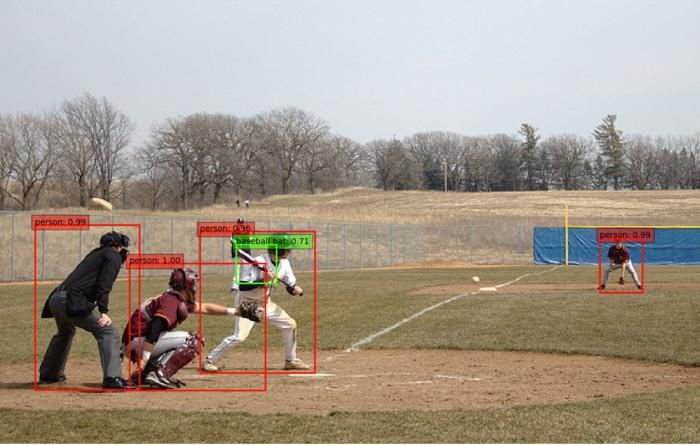

The model is trained on a series of images from different categories
(e.g. person, baseball bat, car, bicycle, , ball etc.).

when predicting on a new image, the model returns a list of detected
objects, each object having the following data:

1.  The **bounding box** surrounding the object. This is defined by 4
    pixel coordinates (e.g. bottom=140, top=300, left=74, right=128),
    but can come in different varieties:

    -   (left, top, right, bottom), or in another order
    -   (left, top, width, height)
    -   (center_x, center_y, semi-width, semi-height)
    -   etc

2.  The **class** of the object (i.e. it is a person or a bicycle). The
    class will come with a certain confidence score (probability), just
    like we saw in Lab4 for classification networks. The model estimates
    a score for each possible class, and the highest score wins.

There may be some variations, depending on the model architecture used.
For example, the YOLO models provide an additional “objectness” score
indicating the confidence that the box is an actual object, regardless
of class.

## 2.2 The SSD network architecture

The SSD (Single-Shot Detector) model architecture is presented below[2]:

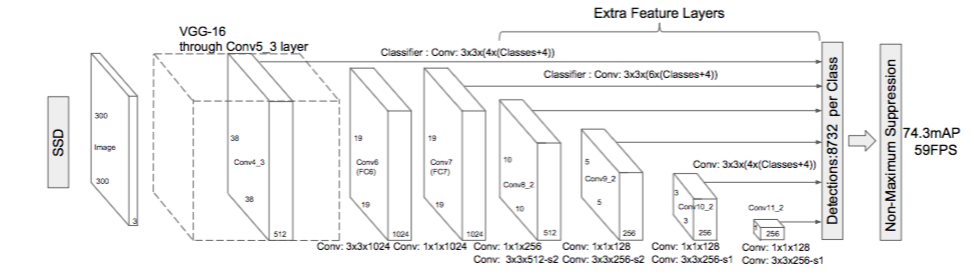

YOLO models have a different, but similar, architecture.

The **input** of the network is a fixed-size $W \times H \times 3$ image
tensor.

The **outputs** of the network are the parameters for all $N$ detection
boxes:

-   A matrix of $N \times 4$ values with the predicted box
    displacements/distortions with respect to all the $N$ anchor boxes
    (i.e. offset x, offset y, height scaling, width scaling).
-   A matrix of $N \times C$ with the predicted class scores for all the
    $N$ boxes. $C$ is the number of distinct classes in the dataset.

$N$ is the total number of predicted boxes over all the image. It can be
very large, e.g. 8732 boxes for a $300 \times 300$ image.

For a larger $1024 \times 640$ image, the number can be much larger,
over 90000 (speaking from experience). Of course, it depends on the
parameters chosen by the designer.

## 2.3 Output encoding and decoding

We have an image with one box around an object, done by a human
(ground-truth). How do we tell the network what it should detect, in the
training phase?

**Output Encoding**: Before training, we must convert the ground-truth
box into displacements with respect to the anchor boxes of the network.
This is known as **encoding**: we convert the desired box in the native
format of the models’ output. During training, we show the image to the
network, and we “tell it” to predict the correct displacements. An
example is provided below[3].

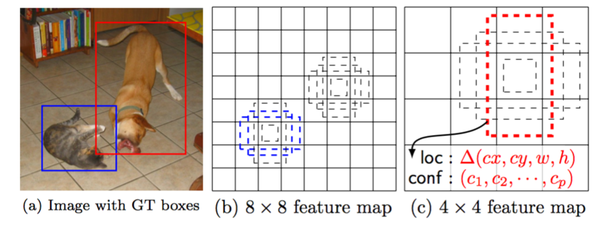

**Output Decoding**: When the network runs, it outputs the predicted
displacements with respect to the anchor boxes. Afterwards, from these
displacements we compute the final object position (in pixels). This is
known as **decoding** the results of the network, since we translate the
native network output into our desired format (pixels). This is
typically done outside the network itself.

## 2.4 Non-Max Suppression

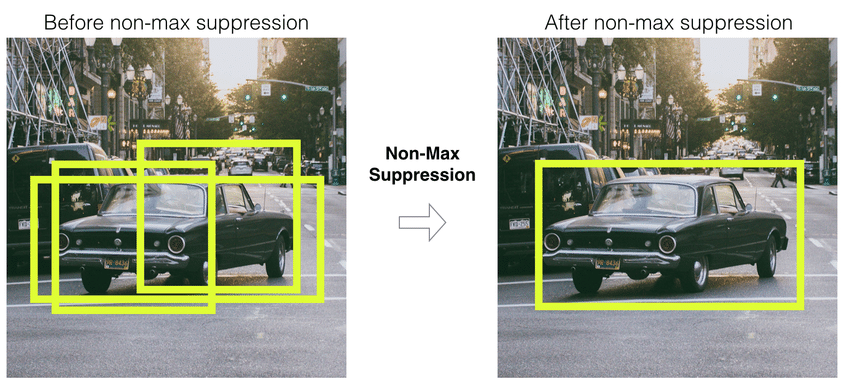

This is a key post-processing step in most object detectors.

A single object is predicted by many anchor boxes. As a result, we will
have **many predicted boxes around one object** in the image, with
slightly different values. We want just one box. Non-Max Suppression
(NMS) is a procedure to select a single box out of a groups of
overlapping boxes (the one with the highest confidence score), and
ignore all the other opverlapping ones. An example illustrated below[4].

The network model is defined by the sequence of convolutional layers in
the architecture. Open the newtork in Matlab in order to inspect the
architure in detail.

## 2.5 The model parameters

The SSD model parameters are the parameters of all the convolutional the
layers. There are no fully-connected layers in the SSD network, and
neither in YOLO.

## 2.6 The cost function

The model produces two kinds of data:

-   box locations (expressed as displacements/distortions with respect
    to the anchot boxes)
-   box classification scores

When training, the predicted boxes are compared to the **real
ground-truth** boxes available. For each ground-truth box, the best
predicted box is selected (the predicted box with the correct class
which overlaps the most with it), and the error is computed based on two
terms:

1.  The **localization error**: typically, is the absolute difference
    between the coordinates or displacements of the ground-truth box and
    the predicted box.

2.  The **classification error**, which compares the class scores of the
    predicted box with the true ground-truth class. The cross-entropy
    loss function is typically used, just like it is used for all other
    classification tasks.

    Besides the predicted boxes which are compared to the ground-truth,
    there are many predicted boxes which corespond to **no** ground
    truth box. There are a few different methods how to treat these,
    some methods (e.g. Focal Loss) being better than others.

## 2.7 Training

Training is done with **backpropagation** and gradient descent (or some
variant of it).

**Backpropagation** = the technique to compute the derivatives of $J$
with respect to all parameters in the network.

This is similar to all CNN networks.

# 3. Walkthrough

Practical work is based on 3 Matlab examples:

1.  [Getting Started with SSD Multibox
    Detection](https://www.mathworks.com/help/vision/ug/getting-started-with-ssd.html)
2.  [Anchor Boxes for Object
    Detection](https://www.mathworks.com/help/vision/ug/anchor-boxes-for-object-detection.html)
3.  [Object Detection Using SSD Deep
    Learning](https://www.mathworks.com/help/vision/ug/object-detection-using-single-shot-detector.html)
4.  [Object Detection Using YOLO v4 Deep
    Learning](https://www.mathworks.com/help/vision/ug/object-detection-using-yolov4-deep-learning.html)

# 4. Practical work

1.  Run the first steps of the [Object Detection Using SSD Deep
    Learning](https://www.mathworks.com/help/vision/ug/object-detection-using-single-shot-detector.html)
    tutorial, and stop before the creation of the SSD network.

2.  Investigate the network architecture by running `analyzeNetwork()`
    on the network variable `lgraph`

    -   How many layers are there?
    -   What is the required size of the input image?
    -   Which are the two output layers?
    -   How many boxes are predicted in all?

3.  Run the next steps of the tutorial, and observer the detected boxes
    on the image.

4.  Download a similar image from the Internet and run the model on it.
    Are the objects detected well?

5.  Locate the call to the `detect()` function and change the detection
    threshold to 0.01. What happens?

    -   What happens if the threshold is set too low?
    -   What would happen if the threshold is set too high?
    -   What is the trade-off involved in choosing a value for the
        threshold?

6.  Set the detection parameter ‘SelectStrongest’ to `false`:
    `detect(... 'SelectStrongest', false)`. Set the threshold to 0.001.
    What changes? How many detected boxes are now?

7.  Set the detection parameter ‘SelectStrongest’ to `false`:
    `detect(... 'SelectStrongest', false)`. Reset the threshold to a
    reasonable value (e.g. 0.4). What changes? How many detected boxes
    are now?

    -   Why do we have multiple boxes around a single object?
    -   Imagine a procedure to keep only a single detection box around
        an object (this is known as **Non-Max Suppresion (NMS)**)

8.  Set the variable `doTraining` to `true` (or 1) and train the model.
    How fast does it work?

# 5. Final questions

TBD

[1] image from
<https://lambdalabs.com/blog/how-to-implement-ssd-object-detection-in-tensorflow/>

[2] image from
<https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab>

[3] image from the SSD paper <https://arxiv.org/abs/1512.02325>

[4] image from [Incremental Training for Image Classification of Unseen
Objects](https://www.researchgate.net/publication/345061606_Incremental_Training_for_Image_Classification_of_Unseen_Objects)
\## The model